In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
dataframe = pd.read_csv("heart.csv")

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataframe.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df = dataframe

categ_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
cont_cols = ["age","trtbps","chol","thalachh","oldpeak"]

df = pd.get_dummies(df, columns = categ_cols, drop_first = True)

X = df.drop(['output'], axis = 1)
y = df[['output']]

scaler = RobustScaler()

X[cont_cols] = scaler.fit_transform(X[cont_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
X_train.shape

(242, 22)

## Regressão Logística

In [13]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


/home/thiago/python-projects/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Rede Neural

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-09-04 14:44:46.347703: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 14:44:47.427398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Treinamento com Validação


Epoch 1/100
8/8 - 1s - loss: 0.6449 - accuracy: 0.6612 - val_loss: 0.5975 - val_accuracy: 0.7213 - 827ms/epoch - 103ms/step
Epoch 2/100
8/8 - 0s - loss: 0.5486 - accuracy: 0.8017 - val_loss: 0.5263 - val_accuracy: 0.8033 - 40ms/epoch - 5ms/step
Epoch 3/100
8/8 - 0s - loss: 0.4849 - accuracy: 0.8223 - val_loss: 0.4715 - val_accuracy: 0.8361 - 37ms/epoch - 5ms/step
Epoch 4/100
8/8 - 0s - loss: 0.4333 - accuracy: 0.8347 - val_loss: 0.4337 - val_accuracy: 0.8525 - 37ms/epoch - 5ms/step
Epoch 5/100
8/8 - 0s - loss: 0.3996 - accuracy: 0.8388 - val_loss: 0.4060 - val_accuracy: 0.8689 - 38ms/epoch - 5ms/step
Epoch 6/100
8/8 - 0s - loss: 0.3717 - accuracy: 0.8512 - val_loss: 0.3878 - val_accuracy: 0.8689 - 37ms/epoch - 5ms/step
Epoch 7/100
8/8 - 0s - loss: 0.3523 - accuracy: 0.8512 - val_loss: 0.3734 - val_accuracy: 0.8689 - 39ms/epoch - 5ms/step
Epoch 8/100
8/8 - 0s - loss: 0.3366 - accuracy: 0.8512 - val_loss: 0.3641 - val_accuracy: 0.8689 - 37ms/epoch - 5ms/step
Epoch 9/100
8/8 - 0s - loss: 

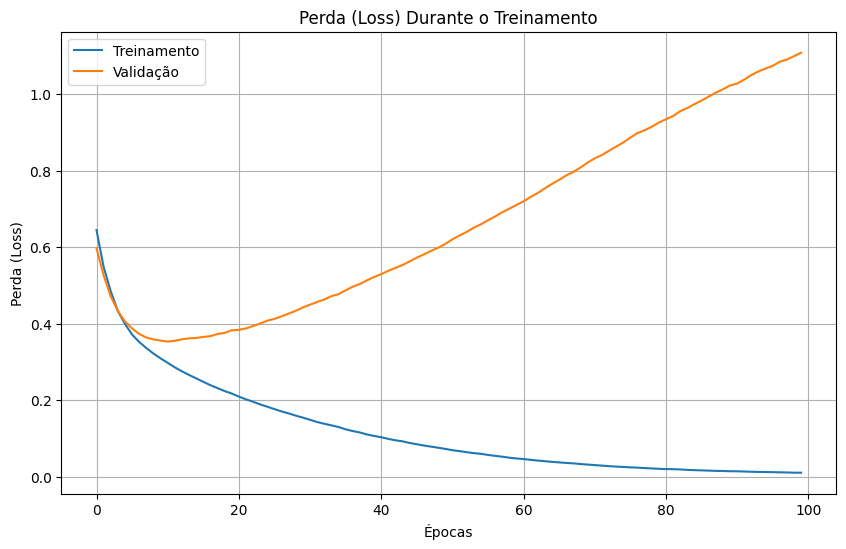

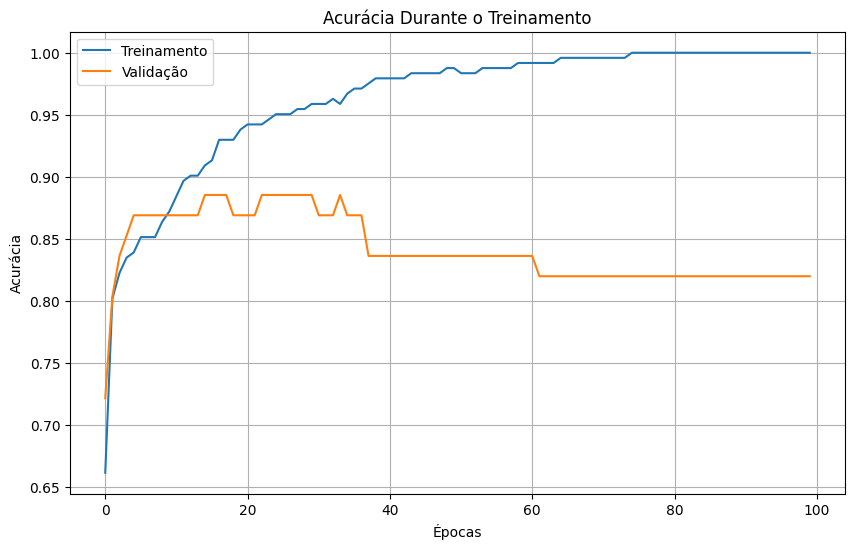

In [18]:
# Carregar o dataset
df = pd.read_csv('heart.csv')

categ_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

df = pd.get_dummies(df, columns = categ_cols, drop_first = True)

# Separar features e target
X = df.drop('output', axis=1)
y = df['output']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (opcional, dependendo dos dados)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir o modelo da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Camada de saída para problemas de classificação binária
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plotar o gráfico de perdas
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Plotar o gráfico de acurácias
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


## Árvore de Decisão

In [19]:
from sklearn.metrics import log_loss

X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=43)
model.fit(X_train, y_train)

# Prever as classes
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Calcular a função de perda (log loss)
# Para isso, precisamos das probabilidades das previsões
y_pred_proba = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)
print(f'Função de Perda (Log Loss): {loss:.2f}')


Acurácia: 0.80
Função de Perda (Log Loss): 7.13


## Máquina de Vetores de Suporte


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('output', axis=1)
y = df['output']

# Dividir o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para a busca
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]  # Relevante apenas para o kernel polinomial
}

# Criar o modelo SVM
svm = SVC()

# Grid Search com validação cruzada
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros e kernel
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Usar o melhor modelo para fazer previsões
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o modelo
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s

[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s

[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=scale

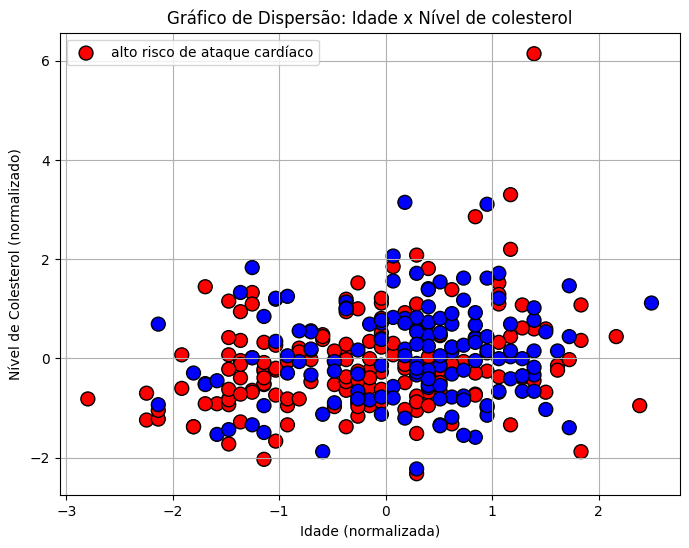

In [21]:
X = df.drop('output', axis=1)  # Substitua 'output' pelo nome da sua coluna alvo, se for diferente
y = df['output']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled['output'] = y.values


df2 = df_scaled[['age', 'chol', 'output']]


colors = ['blue' if value == 0 else 'red' for value in df2['output']]

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df2['age'], df2['chol'], c=colors, marker='o', edgecolors='k', s=100)
plt.xlabel('Idade (normalizada)')
plt.ylabel('Nível de Colesterol (normalizado)')
plt.title('Gráfico de Dispersão: Idade x Nível de colesterol')
plt.grid(True)
plt.legend(['alto risco de ataque cardíaco', 'Z=1'])
plt.show()